In [7]:
library(dplyr)
library(ggplot2)
options(warn = (-1), message = (-1))

In [2]:
combinations <- expand.grid(c("MT", "SD", "SHA256"),
                            c("PIKK", "sbi"))

rawdatafiles <- list.files("../rawdata/")

res <- lapply(1:nrow(combinations), function(index){
  filename <- paste0(combinations[index, 1],
                     "_multinomial_", combinations[index, 2], ".csv")
  if(!(filename %in% rawdatafiles)){ return()}
  
  tmp <- read.csv(paste0("../rawdata/", filename), header = TRUE)
  tmp$PRNG <- rep(combinations[index, 1], nrow(tmp))
  tmp$algorithm <- rep(combinations[index, 2], nrow(tmp))
  return(tmp)
})
res <- do.call(rbind, res)

In [4]:
head(res)
str(res)

prng,algorithm,seed,decision,LR,pvalue,steps,n,k,s,PRNG
MT,PIKK,739828299,None,6.916919e-322,1.0000000,10000000,13,3,10,MT
MT,PIKK,3802979302,None,7.312172e-322,1.0000000,10000000,13,3,10,MT
MT,PIKK,2488119888,None,8.300303e-322,1.0000000,10000000,13,3,10,MT
MT,PIKK,2813529707,None,6.818106e-322,1.0000000,10000000,13,3,10,MT
MT,PIKK,564698376,1,2.117783e+01,0.0472192,7200,13,3,10,MT
MT,PIKK,2114313936,None,6.981148e-321,1.0000000,10000000,13,3,10,MT


'data.frame':	4020 obs. of  11 variables:
 $ prng     : Factor w/ 3 levels "MT","SHA256",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm: Factor w/ 2 levels "PIKK","sbi": 1 1 1 1 1 1 1 1 1 1 ...
 $ seed     : num  7.40e+08 3.80e+09 2.49e+09 2.81e+09 5.65e+08 ...
 $ decision : Factor w/ 2 levels "1","None": 2 2 2 2 1 2 2 2 2 2 ...
 $ LR       : num  6.92e-322 7.31e-322 8.30e-322 6.82e-322 2.12e+01 ...
 $ pvalue   : num  1 1 1 1 0.0472 ...
 $ steps    : int  10000000 10000000 10000000 10000000 7200 10000000 10000000 10000000 10000000 10000000 ...
 $ n        : int  13 13 13 13 13 13 13 13 13 13 ...
 $ k        : int  3 3 3 3 3 3 3 3 3 3 ...
 $ s        : int  10 10 10 10 10 10 10 10 10 10 ...
 $ PRNG     : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
res %>% group_by(PRNG, algorithm) %>% summarise("Rejection rate" = mean(decision == "1"))

PRNG,algorithm,Rejection rate
MT,PIKK,0.044
MT,sbi,0.038
SD,PIKK,0.000
SD,sbi,0.053
SHA256,PIKK,0.000
SHA256,sbi,0.032


In [10]:
rejects <- res %>% filter(decision != "None")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


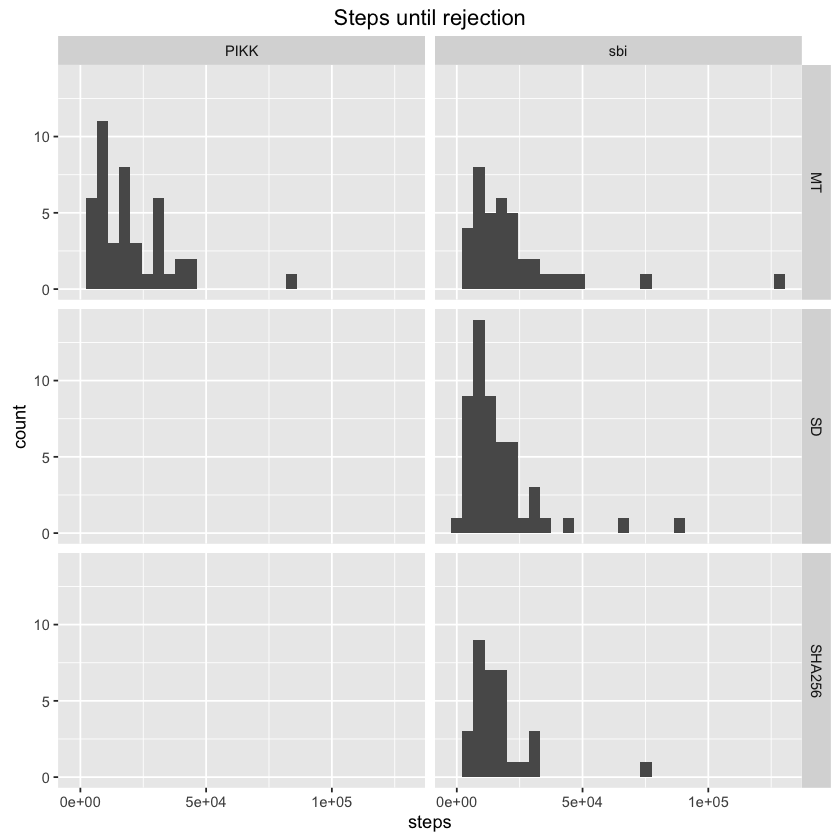

In [12]:
rejects %>% 
    ggplot(aes(steps)) + 
    geom_histogram() + 
    facet_grid(PRNG~algorithm) +
    ggtitle("Steps until rejection")